In [14]:
import numpy as np
import kaydata
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

data = kaydata.DataLoader()

In [2]:
# ROI names
print(data.roi_name)

['Other' 'V1' 'V2' 'V3' 'V3A' 'V3B' 'V4' 'LatOcc']


In [70]:
# Top layer category
print(np.unique(data.labels[0, :]))

['animal' 'artifact' 'entity' 'fruit' 'fungus' 'geological formation'
 'person' 'plant']


In [74]:
# Labels to index
level = 0
unique_label = np.unique(data.labels[level, :])
label_index  = [np.where(unique_label == label)[0][0] for label in data.labels[level, :]]

In [117]:
count_dict = dict(zip(unique_label, [0] * unique_label.size))
for label in data.labels[0, :]:
    count_dict[label] += 1
    
count_dict

{'animal': 643,
 'artifact': 862,
 'entity': 76,
 'fruit': 78,
 'fungus': 6,
 'geological formation': 202,
 'person': 2,
 'plant': 1}

In [3]:
resp_early = data.select_roi(['V1', 'V2'])
resp_mid   = data.select_roi(['V3', 'V3A', 'V3B'])
resp_late  = data.select_roi(['V4', 'LatOcc'])

In [93]:
perplexity = 30
dr_early = TSNE(n_components=2, perplexity=perplexity).fit_transform(resp_early)
dr_mid = TSNE(n_components=2, perplexity=perplexity).fit_transform(resp_mid)
dr_late = TSNE(n_components=2, perplexity=perplexity).fit_transform(resp_late)

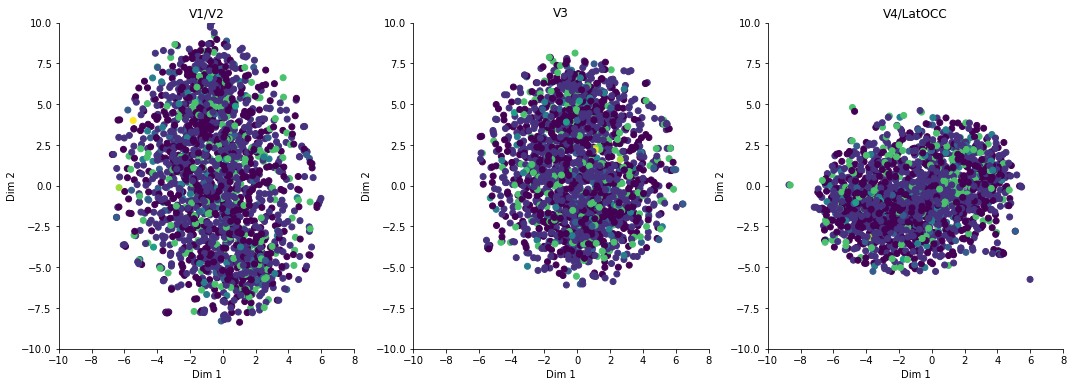

In [111]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].scatter(dr_early[:, 0], dr_early[:, 1], c=label_index)
axs[1].scatter(dr_mid[:, 0], dr_mid[:, 1], c=label_index)
axs[2].scatter(dr_late[:, 0], dr_late[:, 1], c=label_index)

titles = ['V1/V2', 'V3', 'V4/LatOCC']
for idx, ax in zip(range(3), axs):
    ax.set_xlim([-10, 8])
    ax.set_ylim([-10, 10])
    ax.set_xlabel('Dim 1')
    ax.set_ylabel('Dim 2')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(titles[idx])

plt.show()

(-8.0, 8.0)

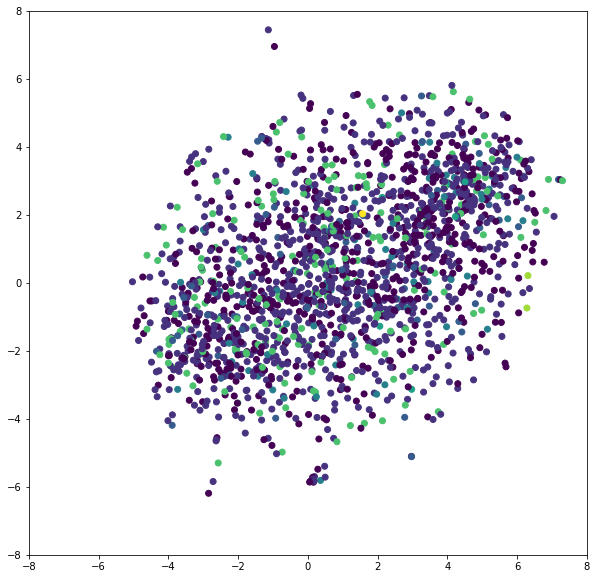

In [92]:
dr_all = TSNE(n_components=2).fit_transform(data.response)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.scatter(dr_all[:, 0], dr_all[:, 1], c=label_index)
ax.set_xlim([-8, 8])
ax.set_ylim([-8, 8])